In [18]:
from keras.callbacks import ModelCheckpoint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
import tensorflow
import tensorflow as tf
from tensorflow import keras
from sklearn.utils import shuffle
from keras.utils.np_utils import to_categorical
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout


In [19]:
x_train = pd.read_csv("/kaggle/input/ahcd1/csvTrainImages 13440x1024.csv",header=None)
y_train = pd.read_csv("/kaggle/input/ahcd1/csvTrainLabel 13440x1.csv",header=None)

x_test = pd.read_csv("/kaggle/input/ahcd1/csvTestImages 3360x1024.csv",header=None)
y_test = pd.read_csv("/kaggle/input/ahcd1/csvTestLabel 3360x1.csv",header=None)

In [20]:
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()-1

x_test = x_test.to_numpy()
y_test = y_test.to_numpy()-1

print('Train Data Size',x_train.shape,y_train.shape)
print('Test Data Size',x_test.shape,y_test.shape)

Train Data Size (13440, 1024) (13440, 1)
Test Data Size (3360, 1024) (3360, 1)


In [21]:
x_train = x_train.reshape(-1,32,32)
x_test = x_test.reshape(-1,32,32)
x_train = x_train/255
x_test = x_test/255


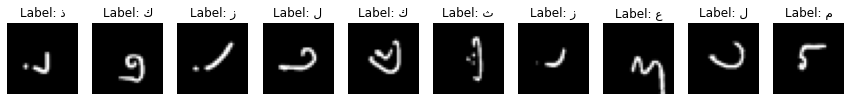

In [22]:


num_images_to_show = 10
selected_indices = np.random.choice(x_train.shape[0], num_images_to_show, replace=False)

# Create a mapping between numerical labels and Arabic characters
label_mapping = {
    0: 'أ', 1: 'ب', 2: 'ت', 3: 'ث', 4: 'ج', 5: 'ح', 6: 'خ', 7: 'د', 8: 'ذ',
    9: 'ر', 10: 'ز', 11: 'س', 12: 'ش', 13: 'ص', 14: 'ض', 15: 'ط', 16: 'ظ',
    17: 'ع', 18: 'غ', 19: 'ف', 20: 'ق', 21: 'ك', 22: 'ل', 23: 'م', 24: 'ن',
    25: 'هـ', 26: 'و', 27: 'ي'
}

# Convert numerical labels to Arabic characters
y_train_labels = [label_mapping[label] for label in y_train.flatten()]

# Plot the selected images with labels
plt.figure(figsize=(15, 7))
for i, idx in enumerate(selected_indices):
    plt.subplot(1, num_images_to_show, i + 1)
    plt.imshow(x_train[idx], cmap='gray')  # Assuming your images are grayscale
    plt.title(f'Label: {y_train_labels[idx]}')
    plt.axis('off')

plt.show()

In [23]:

#  the images are flipped and rotated
# so we transpose each image to be in the correct shape
x_train = np.array([image.T for image in x_train])
x_test = np.array([image.T for image in x_test])

# shuffle
x_train, y_train = shuffle(x_train, y_train)
x_test, y_test = shuffle(x_test, y_test)


#### 1024 pixels which mean 32 x 32

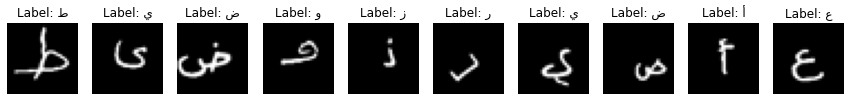

In [24]:
num_images_to_show = 10
selected_indices = np.random.choice(x_train.shape[0], num_images_to_show, replace=False)

# Create a mapping between numerical labels and Arabic characters
label_mapping = {
    0: 'أ', 1: 'ب', 2: 'ت', 3: 'ث', 4: 'ج', 5: 'ح', 6: 'خ', 7: 'د', 8: 'ذ',
    9: 'ر', 10: 'ز', 11: 'س', 12: 'ش', 13: 'ص', 14: 'ض', 15: 'ط', 16: 'ظ',
    17: 'ع', 18: 'غ', 19: 'ف', 20: 'ق', 21: 'ك', 22: 'ل', 23: 'م', 24: 'ن',
    25: 'هـ', 26: 'و', 27: 'ي'
}

# Convert numerical labels to Arabic characters
y_train_labels = [label_mapping[label] for label in y_train.flatten()]

# Plot the selected images with labels
plt.figure(figsize=(15, 7))
for i, idx in enumerate(selected_indices):
    plt.subplot(1, num_images_to_show, i + 1)
    plt.imshow(x_train[idx], cmap='gray')  # Assuming your images are grayscale
    plt.title(f'Label: {y_train_labels[idx]}')
    plt.axis('off')

plt.show()

In [25]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)


y_train_h = to_categorical(y_train)
y_test_h = to_categorical(y_test)

print(y_train.shape, y_test.shape)
print(y_train_h.shape, y_test_h.shape)

(13440,) (3360,)
(13440, 28) (3360, 28)


In [26]:


x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

x_train = x_train.reshape(-1,32,32, 1)
x_val = x_val.reshape(-1,32,32, 1)
x_test = x_test.reshape(-1,32,32, 1)

y_train_h = to_categorical(y_train, num_classes=28)
y_val_h = to_categorical(y_val, num_classes=28)
y_test_h = to_categorical(y_test, num_classes=28)

train_datagen=ImageDataGenerator()

train_generator = train_datagen.flow(x_train, y_train_h, batch_size=64)
val_generator = train_datagen.flow(x_val, y_val_h, batch_size=64)

test_datagen=ImageDataGenerator()

test_generator=test_datagen.flow(
    x_test ,y_test ,batch_size=64
)

In [27]:
# earlystop = EarlyStopping(patience=6)
# learning_rate_reduction=ReduceLROnPlateau(
#     monitor='val_acc',
#     patience= 3,
#     verbose=1,
# )
# callbacks = [earlystop, learning_rate_reduction]

In [28]:
model = Sequential()

model.add(Conv2D(32, (5, 5), padding="same", activation="relu", input_shape=(32, 32, 1)))
model.add(Conv2D(32, (5, 5), activation="relu"))
model.add(Conv2D(32, (5, 5), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (5, 5), padding="same", activation="relu"))
model.add(Conv2D(64, (5, 5), activation="relu"))
model.add(Conv2D(64, (5, 5), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())


model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(256, activation="relu"))
model.add(Dense(28, kernel_regularizer=keras.regularizers.l2(0.001) ,activation='softmax'))

learning_rate = 0.0001

# Create an Adam optimizer with the desired learning rate
adam_optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        832       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 32)        25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 12, 12, 32)        128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 12, 12, 64)        51264     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 64)         

In [29]:
class TestCallback(Callback):
    def __init__(self, test_data):
        self.test_data = test_data
        self.test_acc = []

    def on_epoch_end(self, epoch, logs={}):
        x, y = self.test_data
        loss, acc = self.model.evaluate(x, y, verbose=0)
        self.test_acc.append(acc)
        print(f'\nTesting loss: {loss}, acc: {acc}')

test_callback = TestCallback((x_test, y_test_h))


In [30]:


# Train the model
history = model.fit(
    train_generator, 
    epochs=100,  
    validation_data=val_generator,
    callbacks=[test_callback]  
)

Epoch 1/100
168/168 [==============================] - 3s 10ms/step - loss: 2.9025 - accuracy: 0.1762 - val_loss: 3.7792 - val_accuracy: 0.0305

Testing loss: 3.772958755493164, acc: 0.0357142873108387
Epoch 2/100
168/168 [==============================] - 1s 9ms/step - loss: 1.6812 - accuracy: 0.4457 - val_loss: 7.2488 - val_accuracy: 0.0521

Testing loss: 7.262296676635742, acc: 0.05029761791229248
Epoch 3/100
168/168 [==============================] - 2s 10ms/step - loss: 1.0594 - accuracy: 0.6456 - val_loss: 6.0307 - val_accuracy: 0.0971

Testing loss: 5.9949049949646, acc: 0.09851190447807312
Epoch 4/100
168/168 [==============================] - 1s 9ms/step - loss: 0.7396 - accuracy: 0.7559 - val_loss: 1.0343 - val_accuracy: 0.6771

Testing loss: 0.9783210158348083, acc: 0.6741071343421936
Epoch 5/100
168/168 [==============================] - 1s 9ms/step - loss: 0.5509 - accuracy: 0.8242 - val_loss: 0.5560 - val_accuracy: 0.8307

Testing loss: 0.5073481202125549, acc: 0.84553569

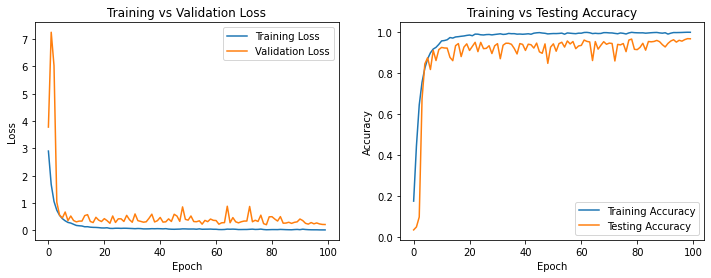

In [31]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Training and test accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(test_callback.test_acc, label='Testing Accuracy')
plt.title('Training vs Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

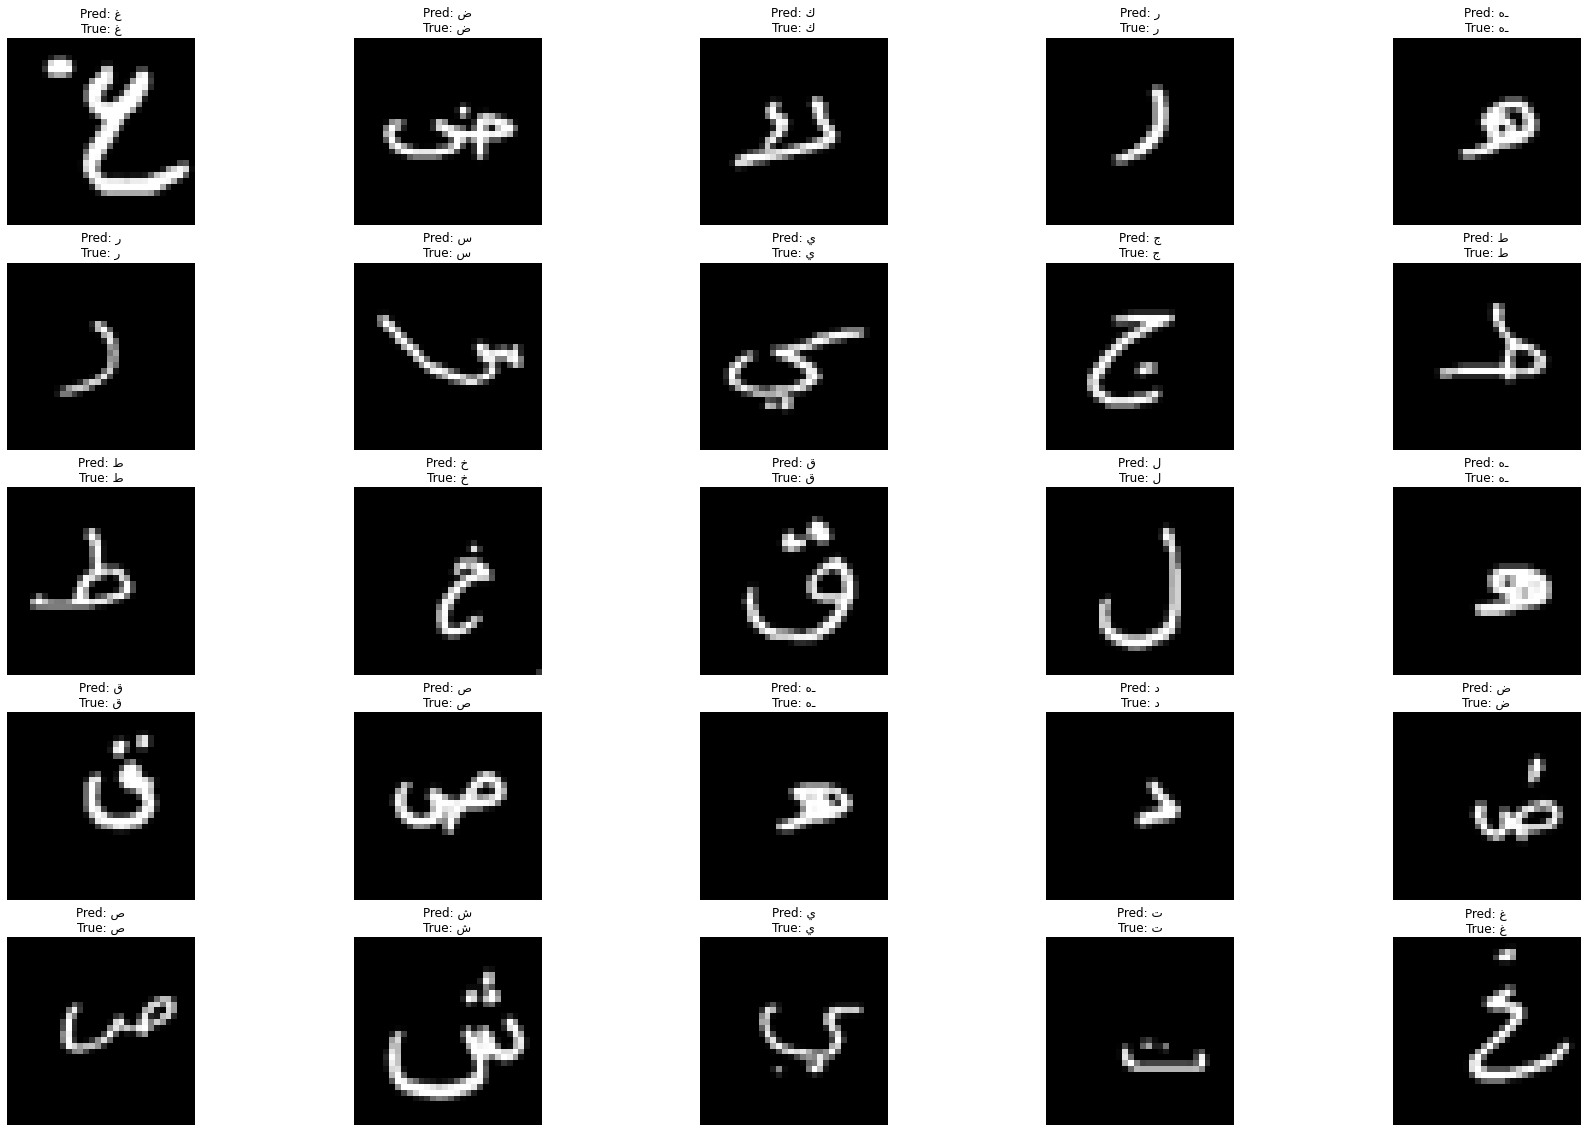

In [32]:
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

# Assuming you have created a label_mapping earlier
arabic_chars = {
    0: 'أ', 1: 'ب', 2: 'ت', 3: 'ث', 4: 'ج', 5: 'ح', 6: 'خ', 7: 'د', 8: 'ذ',
    9: 'ر', 10: 'ز', 11: 'س', 12: 'ش', 13: 'ص', 14: 'ض', 15: 'ط', 16: 'ظ',
    17: 'ع', 18: 'غ', 19: 'ف', 20: 'ق', 21: 'ك', 22: 'ل', 23: 'م', 24: 'ن',
    25: 'هـ', 26: 'و', 27: 'ي'
}

# Display 25 images along with their predicted and true labels
plt.figure(figsize=(30, 20))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i].reshape(32, 32), cmap='gray')
    plt.title(f'Pred: {arabic_chars[predicted_labels[i]]}\nTrue: {arabic_chars[y_test[i]]}')
    plt.axis('off')

plt.show()

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

accuracy = accuracy_score(y_test.flatten(), predicted_labels)
print(f"Accuracy: {accuracy:.4f}")

# Calculate and print precision, recall, and confusion matrix
precision = precision_score(y_test.flatten(), predicted_labels, average='macro')
recall = recall_score(y_test.flatten(), predicted_labels, average='macro')
conf_matrix = confusion_matrix(y_test.flatten(), predicted_labels)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")



Accuracy: 0.9682
Precision: 0.9686
Recall: 0.9682


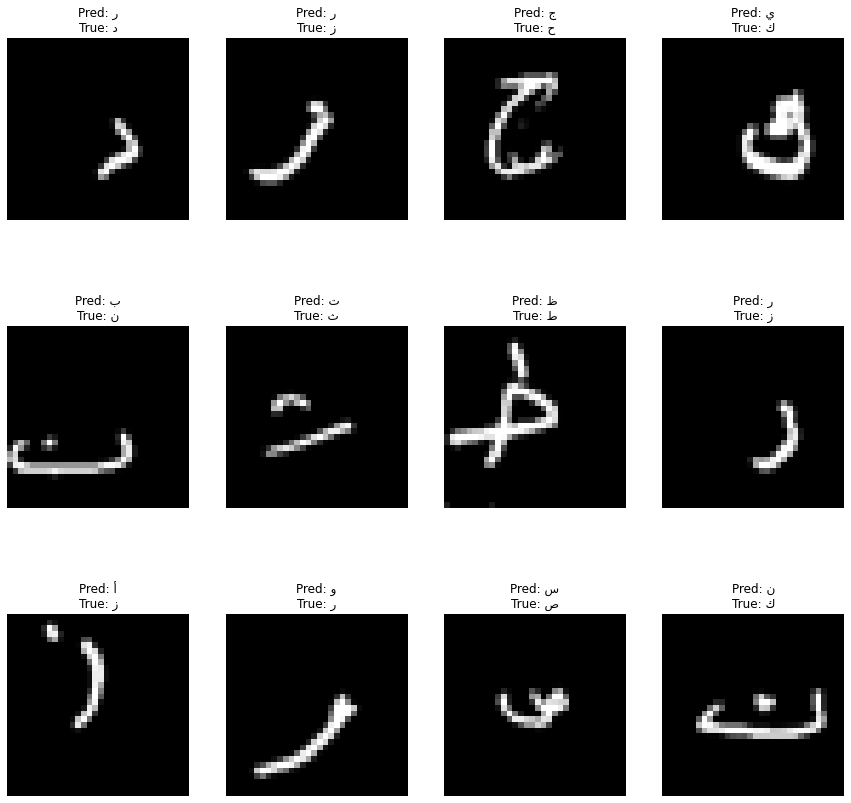

In [34]:
misclassified_indices = np.where(predicted_labels != y_test)[0]


# Display misclassified images along with their predicted and true labels
plt.figure(figsize=(15, 15))
for i, index in enumerate(misclassified_indices[:12]):  # Display the first 9 misclassified samples
    plt.subplot(3, 4, i + 1)
    plt.imshow(x_test[index].reshape(32, 32), cmap='gray')
    plt.title(f'Pred: {arabic_chars[predicted_labels[index]]}\nTrue: {arabic_chars[y_test[index]]}')
    plt.axis('off')

plt.show()